In [1]:
#####Capstone RMBS model Spring 2021 for Springboard Data Science Track #####

In [2]:
###Load required pacakages

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

from fredapi import Fred
fred = Fred(api_key='3ddb1f6991ad9fb5f0afad664be60280')
#API key removed from Github copy

import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [4]:
###Load Freddie Mac mortgage data

In [5]:
##Develop language to Unzip source files?

In [6]:
#Sample data files downloaded and stored here
#Note these files are now stored locally 
filepath = 'J:/Springboard_RMBS_model_data/FHLB/Sample/'

In [7]:
#Root file names for both origination and monthly servicing files
#National Mortgage Database Available at Freddie Mac (https://www.fhfa.gov/DataTools/Downloads/Pages/National-Mortgage-Database-Aggregate-Data.aspx)
origination_root_file ='sample_orig_'
monthly_root_file ='sample_svcg_'

In [8]:
#Initialize both dataframes
origination_data_combined =pd.DataFrame()
monthly_data_combined =pd.DataFrame()

In [9]:
#Documentation placed on Github

In [10]:
#Origination files labels from documentation -- note underscores added to help with syntax
origination_labels = ["Credit_Score",
"First_Payment_Date",
"First_Time_Homebuyer_Flag",
"Maturity_Date",
"MSA",
"MI%",
"Number_of_Units",
"Occupancy_Status",
"Original_CLTV",
"Original_DTI",
"Original_UPB",
"Original_LTV",
"Original_Interest_Rate",
"Channel",
"Prepayment_Penalty_Flag",
"Product_Type",
"Property_State",
"Property_Type",
"Postal_Code",
"Loan_Sequence_Number",
"Loan_Purpose",
"Original_Loan_Term",
"Number_of_Borrowers",
"Seller_Name",
"Servicer_Name",
"Super_Conforming_Flag",
"Pre-HARP_Loan_Seq_Number",
"Program_Indicator",
"HARP_Indicator",
"Property_Valuation_Method"]
#servicing_labels

In [11]:
#Monthly servicing files labels from documentation -- note underscores added to help with syntax
#columns_to_use =list(range(0,13) + range(23,25) + range(26,30))
columns_to_use =[0,1,2,3,4,5,6,7,8,10,11,21,26]
monthly_labels =['Loan_Sequence_Number',
'Monthly_Reporting_Period',
'Current_Actual_UPB',
'Current_Loan_Delinquency_Status',
'Loan_Age',
'Remaining_Months_to_Legal_Maturity',
'Repurchase_Flag',
'Modification_Flag',
'Zero_Balance_Code',
'Current_Interest_Rate',              
'Current_Deferred_UPB',
'Actual_Loss_Calculation',
'Zero_Balance_Removal_UPB']

In [12]:
#Loops through files and appends origination data to single dataframe
for year in range(1999,2020):
    year=str(year)
    filename = filepath+origination_root_file+year+'.txt'
    data=pd.read_csv(filename,sep="|", header =None, names =origination_labels)
    origination_data_combined=origination_data_combined.append(data)

In [13]:
#Initial look at data with info()
origination_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Credit_Score               1050000 non-null  int64  
 1   First_Payment_Date         1050000 non-null  int64  
 2   First_Time_Homebuyer_Flag  1050000 non-null  object 
 3   Maturity_Date              1050000 non-null  int64  
 4   MSA                        905638 non-null   float64
 5   MI%                        1050000 non-null  int64  
 6   Number_of_Units            1050000 non-null  int64  
 7   Occupancy_Status           1050000 non-null  object 
 8   Original_CLTV              1050000 non-null  int64  
 9   Original_DTI               1050000 non-null  int64  
 10  Original_UPB               1050000 non-null  int64  
 11  Original_LTV               1050000 non-null  int64  
 12  Original_Interest_Rate     1050000 non-null  float64
 13  Channel       

In [14]:
#Initial look at data with head()
origination_data_combined.head()

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,MI%,Number_of_Units,Occupancy_Status,Original_CLTV,Original_DTI,...,Loan_Purpose,Original_Loan_Term,Number_of_Borrowers,Seller_Name,Servicer_Name,Super_Conforming_Flag,Pre-HARP_Loan_Seq_Number,Program_Indicator,HARP_Indicator,Property_Valuation_Method
0,799,199903,N,202901,37620.0,0,1,P,70,25,...,N,359,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9
1,635,200212,N,202904,10420.0,0,1,P,76,21,...,P,317,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9
2,787,199905,N,202904,12060.0,999,1,P,80,18,...,P,360,2,FT MORTGAGE COMPANIES,CHASE MANHATTAN MORTGAGE CORPORATION,NaN,NaN,9,NaN,9
3,726,199904,N,202903,28140.0,0,1,P,80,37,...,P,360,2,FLEET MORTGAGE CORPORATION,Other servicers,NaN,NaN,9,NaN,9
4,748,199905,9,202904,17140.0,999,1,P,80,28,...,N,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9


In [15]:
#Number of missing values by column
missing = pd.concat([origination_data_combined.isnull().sum(), 100 * origination_data_combined.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending =False)

,count,%
HARP_Indicator,1049999,99.999905
Pre-HARP_Loan_Seq_Number,1049999,99.999905
Super_Conforming_Flag,1029667,98.063524
MSA,144362,13.748762
Prepayment_Penalty_Flag,4719,0.449429
Seller_Name,658,0.062667
Postal_Code,76,0.007238
Credit_Score,0,0.000000
Property_State,0,0.000000
Program_Indicator,0,0.000000


In [16]:
#Checking HARP_REALTED FLAG...
origination_data_combined = origination_data_combined[origination_data_combined['HARP_Indicator'] != 'Y']

In [17]:
#Drop HARP-RELATED columns -- not much coverage, probably not used -- in any case covered my modification flag
origination_data_combined.drop(labels=['HARP_Indicator','Pre-HARP_Loan_Seq_Number'],axis=1,inplace=True)

In [18]:
#Checking SUPER CONFORMING FLAG...
origination_data_combined['Super_Conforming_Flag'].value_counts()

Y    20333
Name: Super_Conforming_Flag, dtype: int64

In [19]:
#Checking SUPER CONFORMING FLAG...and replacing blanks with N
origination_data_combined['Super_Conforming_Flag'].fillna('N',inplace=True)

In [20]:
#Fix two columns with date types
origination_data_combined['First_Payment_Date']=pd.to_datetime(origination_data_combined['First_Payment_Date'],format='%Y%m', errors='coerce')
origination_data_combined['Maturity_Date']=pd.to_datetime(origination_data_combined['Maturity_Date'],format='%Y%m', errors='coerce')

In [21]:
#Replace missing MSA and assume that these are not in National
origination_data_combined['MSA'].fillna('National',inplace=True)

In [22]:
#Verify MSA fix-1
origination_data_combined['MSA'].value_counts()


National    144362
16974.0      30921
31084.0      25618
12060.0      20458
38060.0      19970
             ...  
21940.0          5
25020.0          4
41900.0          2
10380.0          2
11640.0          1
Name: MSA, Length: 437, dtype: int64

In [23]:
#Verify MSA fix-2
origination_data_combined['MSA'].isnull().sum(axis = 0)

0

In [24]:
#A reasonable number of ZIPs have no corresponding MSA -- spot checked to confirm, keep those ZIPs but...
origination_data_combined[origination_data_combined['MSA']=='National']['Postal_Code']

21       54700.0
22       44600.0
33       96900.0
42       81400.0
47       50400.0
          ...   
49966    30500.0
49994    30500.0
49995    32000.0
49996    53500.0
49997    98600.0
Name: Postal_Code, Length: 144362, dtype: float64

In [25]:
#...dropped postal (ZIP) codes, which provide too much geographic granularity
origination_data_combined.drop(labels=['Postal_Code'],axis=1,inplace=True)

In [26]:
#Vast number of loans have no PP flag, so...
origination_data_combined['Prepayment_Penalty_Flag'].value_counts()

N    1044384
Y        896
Name: Prepayment_Penalty_Flag, dtype: int64

In [27]:
#...missing prepayment fields assumed to be N
origination_data_combined['Prepayment_Penalty_Flag'].fillna('N',inplace=True)

In [28]:
#Largest originator category is the (catch-all) Other sellers, so....
origination_data_combined['Seller_Name'].value_counts()

Other sellers                        265290
WELLS FARGO BANK, N.A.               142445
WELLS FARGO HOME MORTGAGE, INC.       61501
U.S. BANK N.A.                        55142
BANK OF AMERICA, N.A.                 53644
                                      ...  
CMG MORTGAGE, INC.                      129
DITECH FINANCIAL LLC                    121
REGIONS BANK DBA REGIONS MORTGAGE       112
PROSPECT MORTGAGE, LLC                  108
ALLY BANK                               102
Name: Seller_Name, Length: 96, dtype: int64

In [29]:
#...so missing fields are replace with Other Sellers
origination_data_combined['Seller_Name'].fillna('Other_Sellers',inplace=True)

In [30]:
#CREDIT SCORE data looks pretty clean with 999 designating missing data - 1
pd.cut(origination_data_combined['Credit_Score'], bins =[0,500,600,700,800,900,20000]).value_counts()

(700, 800]      708783
(600, 700]      234962
(800, 900]       94277
(500, 600]        9837
(900, 20000]      1688
(0, 500]           452
Name: Credit_Score, dtype: int64

In [31]:
#CREDIT SCORE data looks pretty clean with 999 designating missing data - 2
origination_data_combined[origination_data_combined['Credit_Score']==9999]['Credit_Score']

134      9999
181      9999
372      9999
483      9999
604      9999
         ... 
25607    9999
42766    9999
44724    9999
27547    9999
47959    9999
Name: Credit_Score, Length: 1688, dtype: int64

In [32]:
#Loans without a credit score are deleted
origination_data_combined = origination_data_combined[origination_data_combined['Credit_Score'] != 9999]

In [33]:
origination_data_combined['Orig_Year']=origination_data_combined['First_Payment_Date'].dt.year

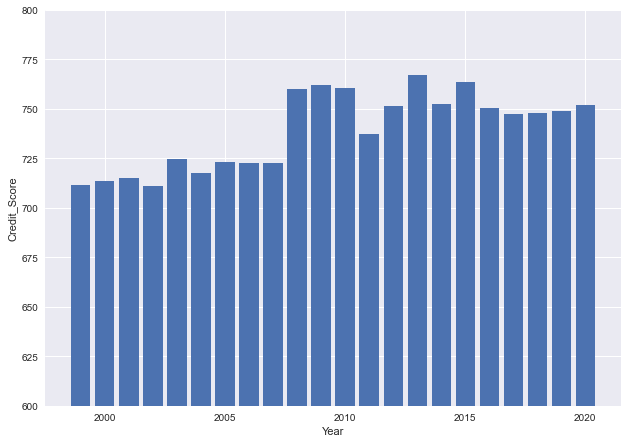

In [34]:
x1 = (origination_data_combined['Orig_Year'].unique())
y1 = (origination_data_combined.groupby('Orig_Year').Credit_Score.mean())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x1,y1)
ax.set_ylim(600,800)
plt.ylabel('Credit_Score')
plt.xlabel('Year')
plt.show()

(400.0, 1000.0)

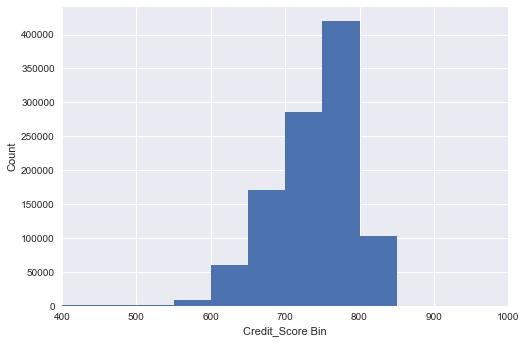

In [35]:
plt.hist(origination_data_combined['Credit_Score'], bins =[0,500,550,600,650,700,750,800,850,900,20000])
plt.ylabel('Count')
plt.xlabel('Credit_Score Bin')
plt.xlim(xmin=400, xmax = 1000)

In [36]:
#Checking First time buyer flag -- just assuming missing number is no
origination_data_combined['First_Time_Homebuyer_Flag'].replace(to_replace='9', value='N', inplace=True)

In [37]:
#Checking MI - since only 9,125 are missing...
origination_data_combined['MI%'].value_counts().head()

0      817761
30      90476
25      79186
12      29316
999      9125
Name: MI%, dtype: int64

In [38]:
#Checking MI -- just assuming there is no MI (like most) and set to missing to 0
origination_data_combined['MI%'].replace(to_replace=999, value=0, inplace=True)

In [39]:
#Checking NUMBER OF UNITS - since only 7 are missing...
origination_data_combined['Number_of_Units'].value_counts()

1     1026730
2       15813
3        2976
4        2785
99          7
Name: Number_of_Units, dtype: int64

In [40]:
#Checking NUMBER OF UNITS ...will delete
origination_data_combined = origination_data_combined[origination_data_combined['Number_of_Units'] != 99]

In [41]:
#Checking OCCUPANCY STATUS -- looks fine
origination_data_combined['Occupancy_Status'].value_counts()

P    942309
I     62334
S     43661
Name: Occupancy_Status, dtype: int64

In [42]:
#Checking ORIGINAL CLTV
pd.cut(origination_data_combined['Original_CLTV'], bins =[0,50,60,70,75,80,90,100,110,120,130,140,200,1000]).value_counts()

(75, 80]       305756
(60, 70]       139627
(90, 100]      135288
(80, 90]       131630
(0, 50]        124009
(70, 75]       116230
(50, 60]        95397
(100, 110]        282
(200, 1000]        48
(110, 120]         25
(140, 200]          7
(120, 130]          5
(130, 140]          0
Name: Original_CLTV, dtype: int64

In [43]:
#Checking ORIGINAL CLTV -- loans with greater than 100% LTV are eliminated as typos/bad data
origination_data_combined = origination_data_combined[origination_data_combined['Original_CLTV'] <= 100]

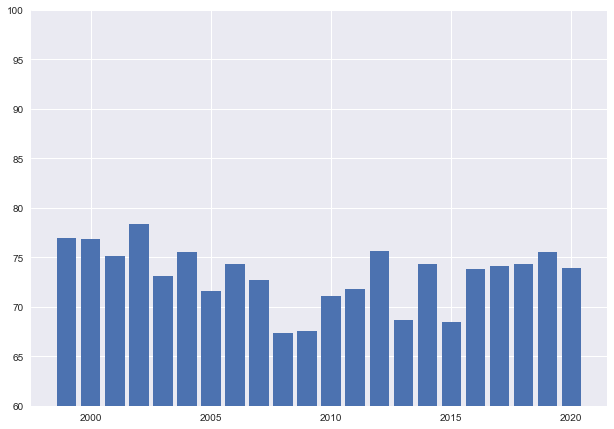

In [44]:
x1 = (origination_data_combined['Orig_Year'].unique())
y1 = (origination_data_combined.groupby('Orig_Year').Original_CLTV.mean())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x1,y1)
ax.set_ylim(60,100)
plt.show()

(60.0, 200.0)

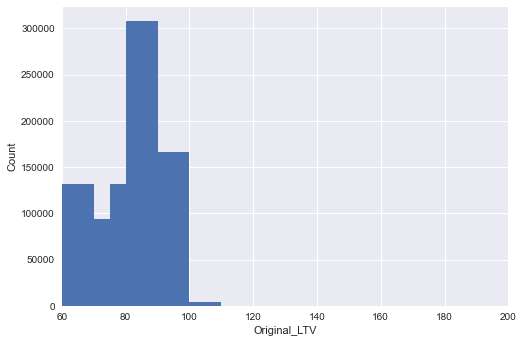

In [45]:
plt.hist(origination_data_combined['Original_LTV'], bins =[0,50,60,70,75,80,90,100,110,120,130,140,200,1000])
plt.ylabel('Count')
plt.xlabel('Original_LTV')
plt.xlim(xmin=60, xmax = 200)

In [46]:
#Checking ORIGINAL DTI 
pd.cut(origination_data_combined['Original_DTI'], bins =[0,10,20,30,40,50,55,60,65,70,75,80,100,1000]).value_counts()

(30, 40]       332591
(20, 30]       266002
(40, 50]       262363
(10, 20]       112595
(50, 55]        26303
(55, 60]        14615
(0, 10]         13544
(100, 1000]     11594
(60, 65]         8330
(65, 70]            0
(70, 75]            0
(75, 80]            0
(80, 100]           0
Name: Original_DTI, dtype: int64

In [47]:
#Checking ORIGINAL DTI -- elimininated 999 (no data)
origination_data_combined = origination_data_combined[origination_data_combined['Original_DTI'] != 999]

In [48]:
#Checking ORIGINAL UPB -- looks OK, no change
pd.cut(origination_data_combined['Original_UPB'], bins =[0,100000,200000,300000,400000,500000,700000,1000000]).value_counts()

(100000, 200000]     428254
(200000, 300000]     236048
(0, 100000]          201019
(300000, 400000]     108160
(400000, 500000]      47763
(500000, 700000]      14039
(700000, 1000000]      1055
Name: Original_UPB, dtype: int64

In [49]:
#Checking ORIGINAL LTV -- looks fine (also helped by cleaning up CLTV)
pd.cut(origination_data_combined['Original_LTV'], bins =[0,50,60,70,80,90,100,110,120,130,140,200,1000]).value_counts()

(70, 80]       451403
(60, 70]       141224
(0, 50]        128869
(90, 100]      113026
(80, 90]       103999
(50, 60]        97822
(100, 110]          0
(110, 120]          0
(120, 130]          0
(130, 140]          0
(140, 200]          0
(200, 1000]         0
Name: Original_LTV, dtype: int64

In [50]:
#Checking ORIGINAL INTEREST RATE -- looks OK, some outliers look unusual, but not change
origination_data_combined['Original_Interest_Rate'].describe()

count    1.036343e+06
mean     5.325925e+00
std      1.387037e+00
min      2.250000e+00
25%      4.250000e+00
50%      5.125000e+00
75%      6.375000e+00
max      1.149000e+01
Name: Original_Interest_Rate, dtype: float64

In [51]:
#CHANNEL -- looks fine but not change
origination_data_combined['Channel'].value_counts()

R    516028
T    251581
C    201068
B     67666
Name: Channel, dtype: int64

In [52]:
#PRODUCT TYPE -- All should be FRM...
origination_data_combined['Product_Type'].value_counts()

FRM    1036199
_          144
Name: Product_Type, dtype: int64

In [53]:
#PRODUCT TYPE ... so entire FIELD is dropped
origination_data_combined.drop(labels=['Product_Type'],axis=1,inplace=True)

In [54]:
#PROPERTY STATE looks OK but...
origination_data_combined['Property_State'].value_counts().tail()

SD    2024
WY    1819
PR    1385
GU     248
VI      38
Name: Property_State, dtype: int64

In [55]:
#PROPERTY STATE... PR, GU, VI loans eliminated
origination_data_combined = origination_data_combined[origination_data_combined['Property_State'] != ('PR','GU','VI')]

In [56]:
#PROPERTY TYPE -- looks OK...
origination_data_combined['Property_Type'].value_counts()

SF    754674
PU    200049
CO     73588
MH      5826
CP      2167
99        39
Name: Property_Type, dtype: int64

In [57]:
#PROPERTY TYPE -- ...but remove 99s
origination_data_combined = origination_data_combined[origination_data_combined['Property_Type'] != '99']

<AxesSubplot:ylabel='Property_Type'>

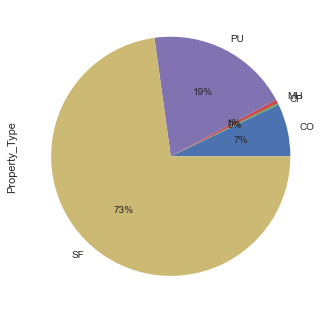

In [58]:
#PROPERTY TYPE -- looks good
origination_data_combined.Property_Type.str.get_dummies().sum().plot.pie(label='Property_Type', autopct='%1.0f%%')

In [59]:
#LOAN PURPOSE -- looks OK...
origination_data_combined['Loan_Purpose'].value_counts()

P    466058
N    299680
C    270566
Name: Loan_Purpose, dtype: int64

<AxesSubplot:ylabel='Loan_Purpose'>

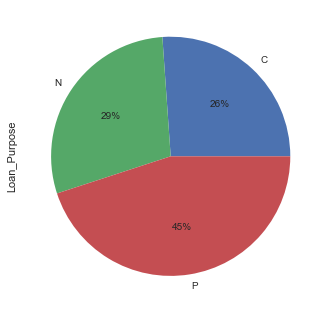

In [60]:
origination_data_combined.Loan_Purpose.str.get_dummies().sum().plot.pie(label='Loan_Purpose', autopct='%1.0f%%')

In [61]:
#ORIGINAL LOAN TERM -- looks OK...
origination_data_combined['Original_Loan_Term'].value_counts()

360    849875
180    131757
240     32096
120     10841
300      4508
        ...  
233         1
224         1
223         1
220         1
504         1
Name: Original_Loan_Term, Length: 220, dtype: int64

In [62]:
#ORIGINAL LOAN TERM ...but deleted loan terms > 400 (possible further investigation)
origination_data_combined = origination_data_combined[origination_data_combined['Original_Loan_Term'] < 400]

In [63]:
#NUMBER OF BORROWERS -- looks OK...
origination_data_combined['Number_of_Borrowers'].value_counts()

2     586501
1     449441
99       140
Name: Number_of_Borrowers, dtype: int64

In [64]:
#NUMBER OF BORROWERS -- ...delete small number of loans with na -- might be interesting variable
origination_data_combined = origination_data_combined[origination_data_combined['Number_of_Borrowers'] != 99]

In [65]:
#SERVICER NAME -- looks OK...
origination_data_combined['Servicer_Name'].value_counts()

Other servicers                           252767
WELLS FARGO BANK, N.A.                    181654
BANK OF AMERICA, N.A.                      68786
U.S. BANK N.A.                             62019
JPMORGAN CHASE BANK, N.A.                  46302
                                           ...  
RUSHMORE LOAN MANAGEMENT SERVICES, LLC       186
U.S. BANK, N.A.                              154
TEXAS CAPITAL BANK, N.A.                     153
FIRST NATIONWIDE MORTGAGE CORPORATION        111
AMTRUST BANK                                 111
Name: Servicer_Name, Length: 75, dtype: int64

In [66]:
#PROGRAM INDICATOR -- looks of questionable value, with few observations...
origination_data_combined['Program_Indicator'].value_counts()

9    951666
9     79616
H      4660
Name: Program_Indicator, dtype: int64

In [67]:
#PROGRAM INDICATOR -- so field deleted
origination_data_combined.drop(labels=['Program_Indicator'],axis=1,inplace=True)

In [68]:
#PROPERTY VALUATION METHOD -- investigate later for comparing to estimated current LTVs, but limited coverage
origination_data_combined['Property_Valuation_Method'].value_counts()

9    886285
2    141430
1      7719
3       508
Name: Property_Valuation_Method, dtype: int64

In [69]:
#PROPERTY VALUATION METHOD -- but delete here
origination_data_combined.drop(labels=['Property_Valuation_Method'],axis=1,inplace=True)

In [70]:
#Convert some variables into categoricals to increases resource efficiency
convert_to_cat = ['First_Time_Homebuyer_Flag','Number_of_Units','Occupancy_Status',
                  'Channel','Prepayment_Penalty_Flag','Property_Type','Loan_Purpose',
                 'Number_of_Borrowers','Super_Conforming_Flag']
for col in convert_to_cat:
    origination_data_combined[col]=origination_data_combined[col].astype('category') 

In [71]:
#Set index equal to LOAN SEQUENCE NUMBER
origination_data_combined.set_index('Loan_Sequence_Number', inplace=True)

In [72]:
#Final data frame

In [73]:
#Sample of final data frame -- initial very small for development -- will increase for model
origination_data_combined=origination_data_combined.sample(frac=.25, replace=False, weights=None, random_state=1234, axis=0)
#using 10% sample

In [74]:
#Re-check sample
origination_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258986 entries, F109Q1201125 to F106Q4127892
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Credit_Score               258986 non-null  int64         
 1   First_Payment_Date         258986 non-null  datetime64[ns]
 2   First_Time_Homebuyer_Flag  258986 non-null  category      
 3   Maturity_Date              258986 non-null  datetime64[ns]
 4   MSA                        258986 non-null  object        
 5   MI%                        258986 non-null  int64         
 6   Number_of_Units            258986 non-null  category      
 7   Occupancy_Status           258986 non-null  category      
 8   Original_CLTV              258986 non-null  int64         
 9   Original_DTI               258986 non-null  int64         
 10  Original_UPB               258986 non-null  int64         
 11  Original_LTV               258986 non-nu

In [75]:
#Re-check sample -- number of missing values by column
missing = pd.concat([origination_data_combined.isnull().sum(), 100 * origination_data_combined.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending =False)

,count,%
Credit_Score,0,0.0
First_Payment_Date,0,0.0
Super_Conforming_Flag,0,0.0
Servicer_Name,0,0.0
Seller_Name,0,0.0
Number_of_Borrowers,0,0.0
Original_Loan_Term,0,0.0
Loan_Purpose,0,0.0
Property_Type,0,0.0
Property_State,0,0.0


In [76]:
#Re-check sample
origination_data_combined.head()

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,MI%,Number_of_Units,Occupancy_Status,Original_CLTV,Original_DTI,...,Prepayment_Penalty_Flag,Property_State,Property_Type,Loan_Purpose,Original_Loan_Term,Number_of_Borrowers,Seller_Name,Servicer_Name,Super_Conforming_Flag,Orig_Year
Loan_Sequence_Number,,,,,,,,,,,,,,,,,,,,,
F109Q1201125,778,2009-04-01,N,2039-03-01,10740.0,0,1,P,62,21,...,N,NM,SF,C,360,1,Other sellers,Other servicers,N,2009
F102Q3438808,765,2002-11-01,N,2032-10-01,National,30,1,S,95,40,...,N,AZ,SF,P,360,2,"WELLS FARGO HOME MORTGAGE, INC.","WELLS FARGO BANK, N.A.",N,2002
F102Q2236734,784,2002-08-01,N,2032-07-01,39580.0,0,1,P,80,27,...,N,NC,SF,P,360,1,"BANK OF AMERICA, N.A.","BANK OF AMERICA, N.A.",N,2002
F103Q2218530,738,2003-07-01,N,2033-06-01,31084.0,0,1,P,58,18,...,N,CA,SF,N,360,2,"WELLS FARGO HOME MORTGAGE, INC.","WELLS FARGO BANK, N.A.",N,2003
F117Q2088651,786,2017-07-01,N,2047-06-01,45300.0,0,1,I,75,23,...,N,FL,PU,C,360,1,Other sellers,Other servicers,N,2017


In [77]:
#Re-check sample
origination_data_combined.shape

(258986, 24)

In [78]:
#### Performance data section
names= monthly_labels

In [79]:
#Loops through files and appends monthly performance data to single dataframe
for year in range(1999,2020):
    year=str(year)
    filename = filepath+monthly_root_file+year+'.txt'
    data=pd.read_csv(filename,sep="|", header =None, names= monthly_labels, usecols =columns_to_use)
    monthly_data_combined=monthly_data_combined.append(data)

In [80]:
#Quick initial look
monthly_data_combined.head()

,Loan_Sequence_Number,Monthly_Reporting_Period,Current_Actual_UPB,Current_Loan_Delinquency_Status,Loan_Age,Remaining_Months_to_Legal_Maturity,Repurchase_Flag,Modification_Flag,Zero_Balance_Code,Current_Interest_Rate,Current_Deferred_UPB,Actual_Loss_Calculation,Zero_Balance_Removal_UPB
0,F199Q1000012,200208,42058.58,0,42,317,NaN,NaN,NaN,6.875,0.0,NaN,NaN
1,F199Q1000012,200209,42011.81,0,43,316,NaN,NaN,NaN,6.875,0.0,NaN,NaN
2,F199Q1000012,200210,41964.77,0,44,315,NaN,NaN,NaN,6.875,0.0,NaN,NaN
3,F199Q1000012,200211,41917.46,0,45,314,NaN,NaN,NaN,6.875,0.0,NaN,NaN
4,F199Q1000012,200212,41869.88,0,46,313,NaN,NaN,NaN,6.875,0.0,NaN,NaN


In [81]:
#Convert some variables into categoricals to increases resource efficiency
convert_to_cat = ['Current_Loan_Delinquency_Status','Repurchase_Flag','Modification_Flag',
                  'Zero_Balance_Code']
for col in convert_to_cat:
    monthly_data_combined[col]=monthly_data_combined[col].astype('category')

In [82]:
#Quick initial look
monthly_data_combined.shape

(53494709, 13)

In [83]:
#Quick initial look
monthly_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53494709 entries, 0 to 657511
Data columns (total 13 columns):
 #   Column                              Dtype   
---  ------                              -----   
 0   Loan_Sequence_Number                object  
 1   Monthly_Reporting_Period            int64   
 2   Current_Actual_UPB                  float64 
 3   Current_Loan_Delinquency_Status     category
 4   Loan_Age                            int64   
 5   Remaining_Months_to_Legal_Maturity  int64   
 6   Repurchase_Flag                     category
 7   Modification_Flag                   category
 8   Zero_Balance_Code                   category
 9   Current_Interest_Rate               float64 
 10  Current_Deferred_UPB                float64 
 11  Actual_Loss_Calculation             float64 
 12  Zero_Balance_Removal_UPB            float64 
dtypes: category(4), float64(5), int64(3), object(1)
memory usage: 4.2+ GB


In [84]:
###Number Of Missing Values By Column
missing = pd.concat([monthly_data_combined.isnull().sum(), 100 * monthly_data_combined.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending =False)

,count,%
Modification_Flag,53476990,99.966877
Actual_Loss_Calculation,53471509,99.956631
Zero_Balance_Code,52708225,98.529791
Zero_Balance_Removal_UPB,52708224,98.529789
Repurchase_Flag,52708168,98.529684
Loan_Sequence_Number,0,0.000000
Monthly_Reporting_Period,0,0.000000
Current_Actual_UPB,0,0.000000
Current_Loan_Delinquency_Status,0,0.000000
Loan_Age,0,0.000000


In [85]:
#Set index equal to LOAN SEQUENCE NUMBER
monthly_data_combined.set_index(['Loan_Sequence_Number'], inplace=True)

In [86]:
#May integrate 11 field with multiple 98% NULLs later as part of impact of mods -- for now focus on 8 remaining fields

In [87]:
#MONTHLY REPORTING PERIOD -- looks OK...
monthly_data_combined['Monthly_Reporting_Period'].max()

202009

In [88]:
#CURRENT DEFERRED UPB -- looks good, with small amounts as expected...
monthly_data_combined['Current_Deferred_UPB'].describe()

count    5.349471e+07
mean     1.629504e+02
std      3.677347e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.957869e+05
Name: Current_Deferred_UPB, dtype: float64

In [89]:
#CURRENT DEFERRED UPB...so keep
monthly_data_combined['Current_Deferred_UPB'].value_counts()

0.00        53289805
19700.00         515
7100.00          512
4200.00          481
35600.00         474
              ...   
9533.72            1
2900.10            1
2675.30            1
39700.00           1
2705.91            1
Name: Current_Deferred_UPB, Length: 6373, dtype: int64

In [90]:
#REMAINING MONTHS TO LEGAL MATURITY -- a few loans longer than 40 years, but this variable likely not important -- DELETE LATER?
monthly_data_combined['Remaining_Months_to_Legal_Maturity'].loc[monthly_data_combined['Remaining_Months_to_Legal_Maturity'] > 485].value_counts()

486    14
490    14
491    14
487    14
489    14
       ..
581     2
600     1
601     1
602     1
603     1
Name: Remaining_Months_to_Legal_Maturity, Length: 118, dtype: int64

In [91]:
#LOAN AGE -- looks fine
monthly_data_combined['Loan_Age'].value_counts()

3      1016578
4      1014237
2      1013957
5      1009238
6      1002397
        ...   
255        318
256        247
257        179
258        114
259         64
Name: Loan_Age, Length: 260, dtype: int64

In [92]:
#CURRENT LOAN DELINQUENCY STATUS -- looks fine but may bucket
monthly_data_combined['Current_Loan_Delinquency_Status'].value_counts()

0     35502360
0     16247812
1       687734
2       215027
3        99312
        ...   
85           1
84           1
83           1
82           1
91           1
Name: Current_Loan_Delinquency_Status, Length: 270, dtype: int64

In [93]:
#CURRENT ACTUAL UPB -- looks fine...
monthly_data_combined['Current_Actual_UPB'].value_counts()

0.00         786695
100000.00     67764
199000.00     48441
99000.00      43817
120000.00     43557
              ...  
164491.61         1
213574.32         1
368781.92         1
84090.61          1
113200.90         1
Name: Current_Actual_UPB, Length: 20946143, dtype: int64

In [94]:
#CURRENT ACTUAL UPB...but may look at some of the high values
pd.cut(monthly_data_combined['Current_Actual_UPB'], bins =[0,100000,200000,300000,400000,500000,600000,700000,800000]).value_counts()

(100000, 200000]    21492035
(0, 100000]         15590869
(200000, 300000]     9883319
(300000, 400000]     4235632
(400000, 500000]     1093523
(500000, 600000]      304712
(600000, 700000]       88169
(700000, 800000]       17278
Name: Current_Actual_UPB, dtype: int64

In [95]:
#Fix MONTHLY REPORTING PERIOD date so all conform to same format
monthly_data_combined['Monthly_Reporting_Period']=pd.to_datetime(monthly_data_combined['Monthly_Reporting_Period'],format='%Y%m', errors='coerce')
#monthly_data_combined['Zero_Balance_Effective_Date']=pd.to_datetime(monthly_data_combined['Zero_Balance_Effective_Date'],format='%Y%m', errors='coerce')
#monthly_data_combined['Due_Date_of_Last_Paid_Installment']=pd.to_datetime(monthly_data_combined['Due_Date_of_Last_Paid_Installment'],format='%Y%m', errors='coerce')

In [96]:
#Assigning label to x-axis 
monthly_data_combined = pd.DataFrame(monthly_data_combined).rename_axis('Monthly_Attribute', axis=1)

In [97]:
monthly_data_pivot = monthly_data_combined.pivot(columns='Monthly_Reporting_Period',values='Current_Loan_Delinquency_Status')

In [98]:
#Initialize data from using origination sample loans only
monthly_data_combined_orig_sample_only =pd.DataFrame(index=origination_data_combined.index.values)
monthly_data_combined_orig_sample_only.rename_axis("Loan_Sequence_Number", inplace=True)

In [99]:
#Assigning label to x-axis and y-axis
monthly_data_combined_orig_sample_only=monthly_data_combined_orig_sample_only.join(monthly_data_combined, on='Loan_Sequence_Number', how='left')
monthly_data_combined_orig_sample_only = pd.DataFrame(monthly_data_combined_orig_sample_only).rename_axis('Monthly_Attribute', axis=1)

In [100]:
#monthly_data_combined_orig_sample_only['Monthly_Reporting_Period'].to_csv('C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/testY.csv')

In [101]:
##Data from FRED
# S&P/Case-Shiller 20-City Composite Home Price (SA): SPCS20RSA
# S&P/Case-Shiller U.S. National Home Price Index (SA): CSUSHPISA
# Unemployment Rate (SA):UNRATENSA
# Labor Force Participation Rate:CIVPART
# 10-Year Treasury Constant Maturity Rate: DGS10
# 30-Year Fixed Rate Mortgage Average in the United States: MORTGAGE30US

In [102]:
#fred.search('shiller')

In [103]:
#Look at graphs quickly -- all check out
quick_look=fred.get_series('CSUSHPISA')

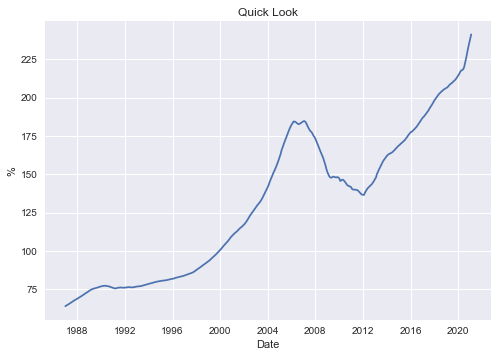

In [104]:
plt.plot(quick_look)
plt.title('Quick Look')
plt.ylabel('%')
plt.xlabel('Date')
plt.show()

In [105]:
#Pull the indixes -- note that the last two needed further work on dates before transposing
CS_HPA_20_cities= pd.DataFrame(fred.get_series('SPCS20RSA')).T
CS_HP =pd.DataFrame(fred.get_series('CSUSHPISA')).T
UNEMPLOY = pd.DataFrame(fred.get_series('UNRATENSA')).T
LF_Part = pd.DataFrame(fred.get_series('CIVPART')).T
Y10_CMT = pd.DataFrame(fred.get_series('DGS10'))
Y30_fixed_mortgage_rate=pd.DataFrame(fred.get_series('MORTGAGE30US'))

In [106]:
##This section to fix Y10_CMT date -- there must be a better way! *******

In [107]:
Y10_CMT = Y10_CMT.resample('M').mean().fillna(0)

In [108]:
Y10_CMT['new_year'] =Y10_CMT.index.year 
Y10_CMT['new_month'] =Y10_CMT.index.month
Y10_CMT['new_day']=1

In [109]:
cols = ['new_year', 'new_month', 'new_day']
Y10_CMT['new_date'] = Y10_CMT[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [110]:
Y10_CMT['new_date'] =pd.to_datetime(Y10_CMT['new_date'])

In [111]:
Y10_CMT['new_date']

1962-01-31   1962-01-01
1962-02-28   1962-02-01
1962-03-31   1962-03-01
1962-04-30   1962-04-01
1962-05-31   1962-05-01
                ...    
2021-01-31   2021-01-01
2021-02-28   2021-02-01
2021-03-31   2021-03-01
2021-04-30   2021-04-01
2021-05-31   2021-05-01
Freq: M, Name: new_date, Length: 713, dtype: datetime64[ns]

In [112]:
Y10_CMT.set_index('new_date',inplace=True)

In [113]:
Y10_CMT=Y10_CMT[0]

In [114]:
Y10_CMT

new_date
1962-01-01    4.083182
1962-02-01    4.039444
1962-03-01    3.930455
1962-04-01    3.843000
1962-05-01    3.873636
                ...   
2021-01-01    1.081053
2021-02-01    1.257895
2021-03-01    1.610870
2021-04-01    1.635000
2021-05-01    1.602500
Name: 0, Length: 713, dtype: float64

In [115]:
Y10_CMT=Y10_CMT.T

In [116]:
#This section to fix Y30_fixed_mortgage_rate date -- there must be a better way! *******

In [117]:
Y30_fixed_mortgage_rate = Y30_fixed_mortgage_rate.resample('M').mean().fillna(0)

In [118]:
Y30_fixed_mortgage_rate['new_year'] =Y30_fixed_mortgage_rate.index.year 
Y30_fixed_mortgage_rate['new_month'] =Y30_fixed_mortgage_rate.index.month
Y30_fixed_mortgage_rate['new_day']=1

In [119]:
cols = ['new_year', 'new_month', 'new_day']
Y30_fixed_mortgage_rate['new_date'] = Y30_fixed_mortgage_rate[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [120]:
Y30_fixed_mortgage_rate['new_date'] =pd.to_datetime(Y30_fixed_mortgage_rate['new_date'])

In [121]:
Y30_fixed_mortgage_rate['new_date']

1971-04-30   1971-04-01
1971-05-31   1971-05-01
1971-06-30   1971-06-01
1971-07-31   1971-07-01
1971-08-31   1971-08-01
                ...    
2021-01-31   2021-01-01
2021-02-28   2021-02-01
2021-03-31   2021-03-01
2021-04-30   2021-04-01
2021-05-31   2021-05-01
Freq: M, Name: new_date, Length: 602, dtype: datetime64[ns]

In [122]:
Y30_fixed_mortgage_rate.set_index('new_date',inplace=True)

In [123]:
Y30_fixed_mortgage_rate=Y30_fixed_mortgage_rate[0]

In [124]:
Y30_fixed_mortgage_rate

new_date
1971-04-01    7.3100
1971-05-01    7.4250
1971-06-01    7.5300
1971-07-01    7.6040
1971-08-01    7.6975
               ...  
2021-01-01    2.7350
2021-02-01    2.8100
2021-03-01    3.0825
2021-04-01    3.0600
2021-05-01    2.9600
Name: 0, Length: 602, dtype: float64

In [125]:
Y30_fixed_mortgage_rate=Y30_fixed_mortgage_rate.T

In [126]:
##End of the date fixes

In [127]:
#Preparing to constructing data frame for macro data
macro_index_list =[CS_HPA_20_cities,CS_HP,UNEMPLOY,LF_Part,Y10_CMT,Y30_fixed_mortgage_rate]
macro_index_labels =['CS_HPA_20_cities','CS_HP','UNEMPLOY','LF_Part','Y10_CMT','Y30_fixed_mortgage_rate']

In [128]:
macro_data =pd.DataFrame()
macro_data=macro_data.fillna(0)

In [129]:
#Appending all the indices to data frame - Note cannot include all appends in single ccell
macro_data = macro_data.append(CS_HPA_20_cities)

In [130]:
macro_data = macro_data.append(CS_HP)

In [131]:
macro_data = macro_data.append(UNEMPLOY)

In [132]:
macro_data = macro_data.append(LF_Part)

In [133]:
macro_data = macro_data.append(Y10_CMT)

In [134]:
macro_data = macro_data.append(Y30_fixed_mortgage_rate)

In [135]:
#Adding index labels to data frame
macro_data.index=macro_index_labels

In [136]:
#Deleting unneccessary history
macro_data=macro_data.loc[:,"1998-1-01":"2020-12-01"]

In [137]:
macro_data.T
#macro_data.to_csv('C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/testZ.csv')

,CS_HPA_20_cities,CS_HP,UNEMPLOY,LF_Part,Y10_CMT,Y30_fixed_mortgage_rate
1998-01-01,NaN,87.619,5.2,67.1,5.544500,6.9940
1998-02-01,NaN,88.007,5.0,67.1,5.574737,7.0425
1998-03-01,NaN,88.446,5.0,67.1,5.647273,7.1275
1998-04-01,NaN,88.883,4.1,67.0,5.637619,7.1400
1998-05-01,NaN,89.368,4.2,67.0,5.652500,7.1440
...,...,...,...,...,...,...
2020-08-01,228.710737,222.690,8.5,61.7,0.650000,2.9350
2020-09-01,232.045219,225.820,7.7,61.4,0.679524,2.8900
2020-10-01,235.664228,229.309,6.6,61.6,0.787143,2.8340
2020-11-01,239.045367,232.560,6.4,61.5,0.870000,2.7650


In [138]:
#Changing index labels to facilitate joining
macro_data = macro_data.rename_axis('Macro_Index').rename_axis("Monthly_Reporting_Period", axis="columns")

In [139]:
#Transpose to join to monthly file
macro_data=macro_data.T

In [140]:
#Join monthly loan file to macro file
monthly_loan_macro_combined=monthly_data_combined_orig_sample_only.join(macro_data, on='Monthly_Reporting_Period', how='left')

In [141]:
#Final join 
all_data_combined = monthly_loan_macro_combined.join(origination_data_combined, on='Loan_Sequence_Number', how='left')

In [142]:
#changing to df
df=all_data_combined.copy()

In [143]:
df.reset_index(inplace=True)

In [144]:
df.set_index(['Loan_Sequence_Number', 'Monthly_Reporting_Period'], inplace=True)

In [145]:
##Create numeric value only delinquency field

In [146]:
df['numeric_Loan_Delinquency_Status']=df['Current_Loan_Delinquency_Status']

In [147]:
df['numeric_Loan_Delinquency_Status'].replace(to_replace='R', value=np.nan, inplace=True)

In [148]:
df['numeric_Loan_Delinquency_Status'] = df.groupby('Loan_Sequence_Number').numeric_Loan_Delinquency_Status.ffill()

In [149]:
##Creating and modifying fields 

In [150]:
#Create unambiguous labels for ZB code

#1 :'Prepaid or Matured',
#2 : 'Third Party Sale',
#3 : 'Short Sale or Charge Off',
#6 : 'Repurchase prior to Property Disposition',
#9 : 'REO Disposition',
#15: 'Note sale/Reperforming sale'


ZB_mapping ={1 :'Current',
2 : 'Default',
3 : 'Default',
6 : 'Repurchase',
9 : 'Default',
15 : 'Default'}

In [151]:
df['Zero_Balance_Code']=df['Zero_Balance_Code'].map(ZB_mapping)

In [152]:
#df['Zero_Balance_Code']=pd.to_numeric(df['Zero_Balance_Code'],errors='coerce')

In [153]:
#Consolidate late stage delinquencies

In [154]:
df['consol_Loan_Delinquency_Status']=df['Current_Loan_Delinquency_Status']

In [155]:
df['consol_Loan_Delinquency_Status'].replace(to_replace='R',value=9999, inplace=True)

In [156]:
df['consol_Loan_Delinquency_Status']=pd.to_numeric(df['consol_Loan_Delinquency_Status'],errors='coerce')

In [157]:
def consol_DQ(x):
    if x == 0:
        return 'Current'
    if x == 1:
        return '1m_DQ'
    if x == 2:
        return '2m_DQ'
    if x == 3:
        return '3m_DQ'
    if x == 4:
        return '4m_DQ'
    if x == 5:
        return '5m_DQ'
    if x == 6:
        return '6m_DQ'
    if x > 6 and x <= 12:
        return '7m_to_12m_DQ'
    if x > 12 and x <= 24:
        return '13m_to_24m_DQ'
    if x > 24 and x <= 9998:
        return '>24m_DQ'
    if x==9999:
        return 'REO'
    else:
        return 'missing'

In [158]:
df['consol_Loan_Delinquency_Status']=df['consol_Loan_Delinquency_Status'].apply(consol_DQ)

In [159]:
df=df[df.consol_Loan_Delinquency_Status !='missing']

In [160]:
#Carry forward modification flag

In [161]:
df['Modification_Flag']=df.groupby('Loan_Sequence_Number').Modification_Flag.ffill()

In [162]:
#Number of delinquencies in last 12 and 24 months

In [163]:
#Under development

In [164]:
##Create target variable from ZB code and current delinquency status fields

In [165]:
df['Target_Performance_Variable']= df['consol_Loan_Delinquency_Status']

In [166]:
df['Zero_Balance_Code'] = df['Zero_Balance_Code'].fillna(0)

In [167]:
df['Target_Performance_Variable'] = np.where((df.Zero_Balance_Code == 0),df['Target_Performance_Variable'],df['Zero_Balance_Code'])

In [168]:
#Ever defaulted 

In [169]:
df['Zero_Balance_Code'].replace(to_replace=0, value=np.nan, inplace=True)

In [170]:
df['Ever_Default'] = df.groupby('Loan_Sequence_Number').Zero_Balance_Code.bfill()

In [171]:
#Principal repayment

In [172]:
df['prin_repay_pct'] = (df['Current_Actual_UPB']-df['Current_Actual_UPB'].groupby('Loan_Sequence_Number').shift(1, axis=0))/df['Current_Actual_UPB'].groupby('Loan_Sequence_Number').shift(1, axis=0)

In [173]:
#This  zeros out the first 
df.loc[df.groupby('Loan_Sequence_Number')['prin_repay_pct'].head(1).index, 'prin_repay_pct'] = 0

In [174]:
#HPA adjustment to LTV

In [175]:
implied_orig_house_px = (1/df['Original_LTV'])*df['Original_UPB']

In [176]:
hpa = ((df['CS_HP'] -df.groupby('Loan_Sequence_Number')['CS_HP'].first())/df.groupby('Loan_Sequence_Number')['CS_HPA_20_cities'].first())*100

In [177]:
implied_new_house_px = implied_orig_house_px*(1+(hpa/100))

In [178]:
df['HPA_adjusted_LTV']=df['Current_Actual_UPB']/implied_new_house_px

In [179]:
#Fix LTVs for when loan balance = 0

In [180]:
df.loc[(df['HPA_adjusted_LTV'] == 0) & (df['Current_Actual_UPB'] == 0), 'HPA_adjusted_LTV'] = df['HPA_adjusted_LTV'].shift(periods=1,axis=0) 

In [181]:
#Adjust LTV

In [182]:
#Loss severity

In [183]:
df.drop(columns=['Repurchase_Flag'], inplace=True)

In [184]:
#For development purposes, saving locally to inspect
df.to_csv('C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/data_frame_for_EDA.csv')
#df.to_csv('C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/test1.csv')

In [185]:
##Pandas profiling for use with final data frame

In [186]:
#report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
#report

In [187]:
#profile_report = df.profile_report(html={'style': {'full_width': True}})
#profile_report.to_file("C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/example.html")

In [188]:
## Future tasks
# Integrate loss data -- OK
# Convert ZB code to categorical --OK 
# Convert DQ to other hist fields
# Create one performance field -- OK
# Make sure that mod flags carry forward into future --OK
# Ever defaulted
# Ever (other) ?
# Function to adjust LTVs for HPI
# Prepayments
#    Amortization  schedule
#    Implied prepayment (percent of UPB)